In [290]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [291]:
df_admissions = pd.read_csv('Admission_predict.csv')

# display first five observations using head()
df_admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.500000,4.500000,9.650000,1,1
1,2,324,107,4,4.000000,4.500000,8.870000,1,1
2,3,316,104,3,3.000000,3.500000,8.000000,1,0
3,4,322,110,3,3.500000,2.500000,8.670000,1,1
4,5,314,103,2,2.000000,3.000000,8.210000,0,0


In [292]:
df_admissions.shape

(400, 9)

In [293]:
# use 'dtypes' to check the data type of a variable
df_admissions.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit        int64
dtype: object

In [294]:
df_admissions['Research'] = df_admissions['Research'].astype(object)

In [295]:
df_admissions.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit        int64
dtype: object

In [296]:

df_admissions = df_admissions.drop('Serial No.', axis = 1)

In [297]:
df_target = df_admissions['Chance of Admit']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Chance of Admit' using drop()
# 'axis = 1' drops the specified column
df_feature = df_admissions.drop('Chance of Admit', axis = 1)

In [298]:
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index(['Research'], dtype='object')

In [299]:
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)
dummy_var

,Research_1
0,1
1,1
2,1
3,1
4,0
5,1
6,1
7,0
8,0
9,0


In [300]:
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'], dtype='object')

In [301]:
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

In [302]:
df_num_scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029


In [303]:
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

# display first five observations
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,1
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,1
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,1
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,1
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,0


In [304]:
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 121, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (320, 8)
y_train (320,)
X_test (80, 8)
y_test (80,)


In [305]:
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.256542
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            7
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                  0.6261
Time:                        13:55:31   Log-Likelihood:                -82.094
converged:                       True   LL-Null:                       -219.55
Covariance Type:            nonrobust   LLR p-value:                 1.371e-55
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8077      0.324     -2.494      0.013      -1.442      -0.173
GRE Scor

In [306]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 

In [307]:
df_odds

,Odds
const,0.445882
GRE Score,1.562145
TOEFL Score,2.058312
University Rating,1.258078
SOP,1.553245
LOR,1.626661
CGPA,9.794833
Research_1,1.875626


In [308]:
y_pred_prob = logreg.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

215   0.997340
200   0.170906
268   0.978791
143   0.999738
37    0.000851
dtype: float64

In [309]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [310]:
y_pred[0:5]

[1, 0, 1, 1, 0]

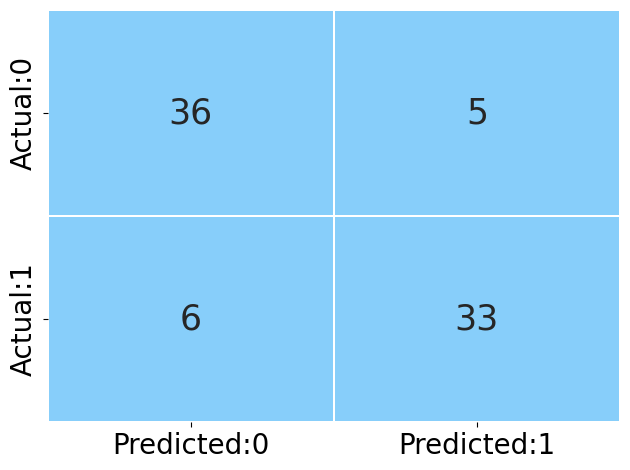

In [311]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()
plt.show()

In [312]:
acc_table = classification_report(y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.87      0.85      0.86        39

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80



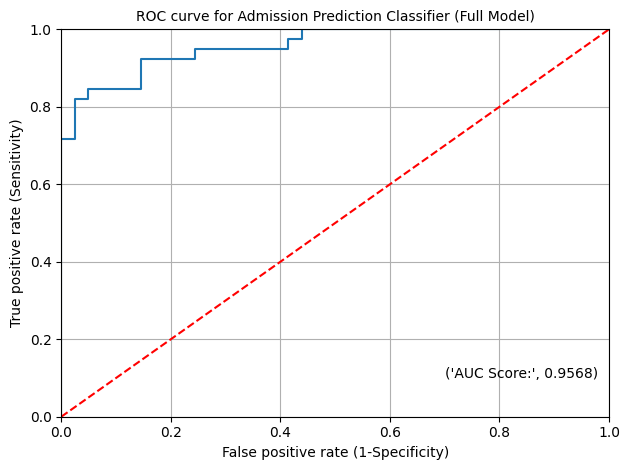

In [313]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 10)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 10)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 10)
plt.text(x = 0.7, y = 0.1, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)
plt.tight_layout()
plt.show()

In [314]:
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [315]:
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(logreg, value)

In [316]:
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.767042,0.685185,0.948718,0.762500,0.529120,0.795699
1,0.200000,0.815822,0.740000,0.948718,0.812500,0.627329,0.831461
2,0.300000,0.839587,0.782609,0.923077,0.837500,0.676214,0.847059
3,0.400000,0.876173,0.837209,0.923077,0.875000,0.750468,0.878049
4,0.500000,0.862101,0.868421,0.846154,0.862500,0.724656,0.857143
5,0.600000,0.898687,0.942857,0.846154,0.900000,0.799373,0.891892
6,0.700000,0.898061,0.969697,0.820513,0.900000,0.799121,0.888889
7,0.800000,0.885241,0.968750,0.794872,0.887500,0.773869,0.873239
8,0.900000,0.846779,0.965517,0.717949,0.850000,0.697923,0.823529


In [317]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.846154,0.048780,0.613095,0.797373
1,0.820513,0.024390,0.703491,0.796123
2,0.923077,0.146341,0.420020,0.776735
3,0.820513,0.048780,0.671488,0.771732
4,0.717949,0.000000,0.910197,0.717949


In [318]:
y_pred_youden = [ 0 if x < 0.62 else 1 for x in y_pred_prob]

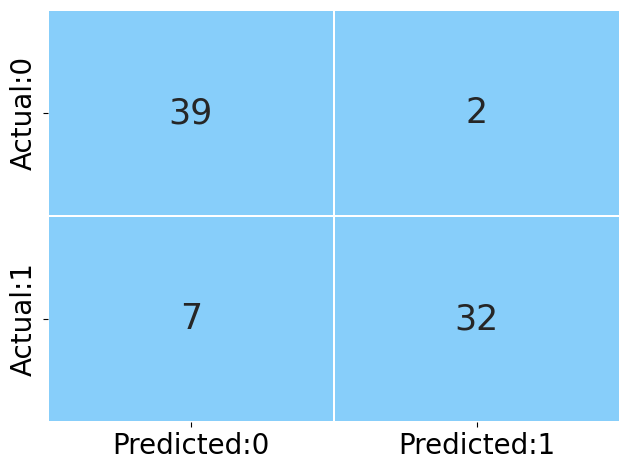

In [319]:
cm = confusion_matrix(y_test, y_pred_youden)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()
plt.show()

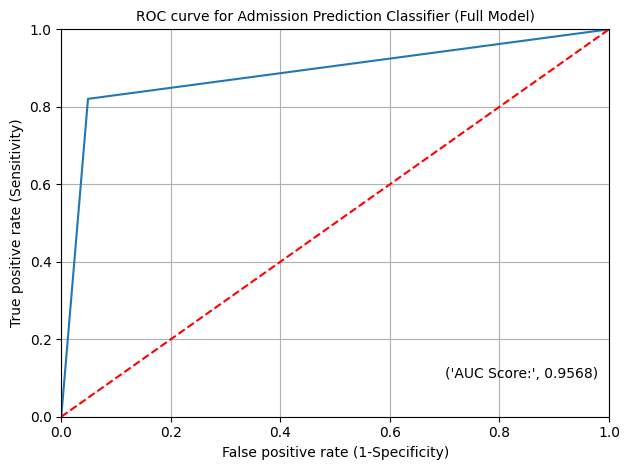

In [320]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_youden)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 10)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 10)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 10)
plt.text(x = 0.7, y = 0.1, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)
plt.tight_layout()
plt.show()

In [321]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
ypred_lr = lr.predict(X_test)

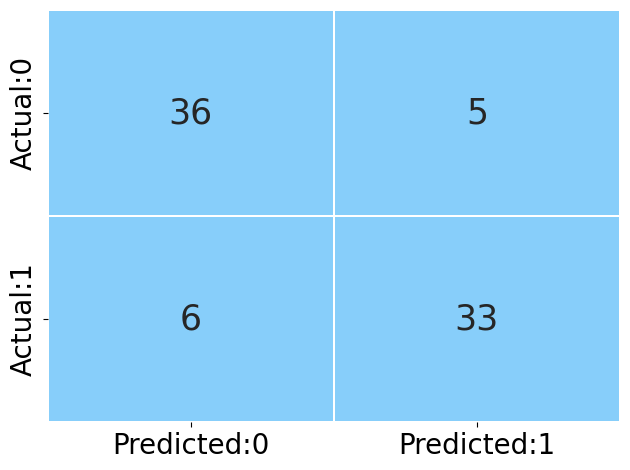

In [322]:
cm = confusion_matrix(y_test, ypred_lr)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()
plt.show()

In [323]:
print('Accuracy : ', accuracy_score(y_test,ypred_lr ))
print('Classification Report  : \n', classification_report(y_test,ypred_lr ))

Accuracy :  0.8625
Classification Report  : 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.87      0.85      0.86        39

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80



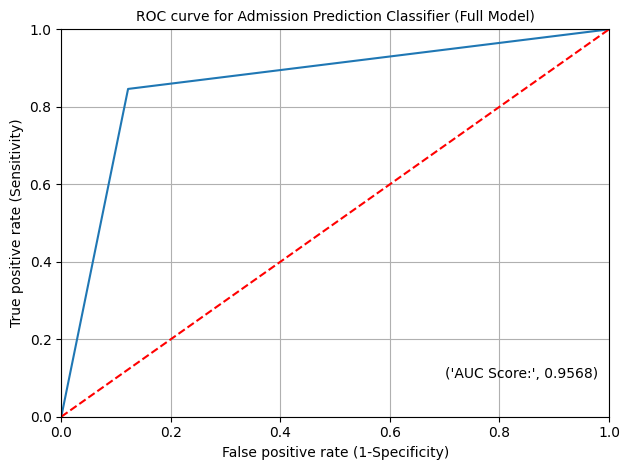

In [324]:
fpr, tpr, thresholds = roc_curve(y_test, ypred_lr)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 10)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 10)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 10)
plt.text(x = 0.7, y = 0.1, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)
plt.tight_layout()
plt.show()

In [325]:
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
### To be able to see maximum columns on screen
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [326]:
df_admissions.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.500000,4.500000,9.650000,1,1
1,324,107,4,4.000000,4.500000,8.870000,1,1
2,316,104,3,3.000000,3.500000,8.000000,1,0
3,322,110,3,3.500000,2.500000,8.670000,1,1
4,314,103,2,2.000000,3.000000,8.210000,0,0


In [327]:
X = df_admissions.drop('Chance of Admit',1)
y = df_admissions['Chance of Admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)


In [328]:
ss = StandardScaler()
X_train=ss.fit_transform(X_train)
X_train

array([[ 0.58772699, -0.02912599, -0.05571052, ...,  0.07907984,
        -0.0587481 ,  0.91601335],
       [-0.28378662, -1.02773134, -0.05571052, ..., -0.47104076,
        -0.90721616, -1.09168714],
       [-0.45808934, -0.19556022, -0.94707888, ..., -0.47104076,
        -0.54121033,  0.91601335],
       ...,
       [-0.19663526, -0.36199444, -0.05571052, ..., -1.02116135,
        -0.47466382, -1.09168714],
       [-1.4167543 , -1.19416557, -0.05571052, ..., -0.47104076,
         0.12425482,  0.91601335],
       [-0.28378662, -0.86129712, -0.05571052, ..., -1.02116135,
         0.15752808, -1.09168714]])

In [329]:

X_test=ss.transform(X_test)
X_test

array([[-0.71954342, -0.19556022, -0.05571052,  0.13744801, -1.02116135,
        -0.62439347,  0.91601335],
       [ 0.41342427,  0.30374246,  0.83565784,  0.63164309,  0.62920043,
         0.15752808,  0.91601335],
       [-1.15530022, -1.19416557, -0.94707888, -0.35674708,  0.07907984,
        -0.87394291,  0.91601335],
       [-1.8525111 , -1.36059979, -0.94707888, -0.85094216, -0.47104076,
        -1.55604469, -1.09168714],
       [-0.02233254, -0.86129712, -0.05571052, -1.34513725, -0.47104076,
        -1.97196041, -1.09168714],
       [-0.45808934, -1.36059979, -1.83844724, -0.85094216, -0.47104076,
        -0.25838764,  0.91601335],
       [ 2.06930011,  2.13451894,  0.83565784,  1.62003327,  1.72944162,
         1.52173164,  0.91601335],
       [ 1.28493787,  1.63521627,  0.83565784,  1.12583818,  1.72944162,
         1.38863861,  0.91601335],
       [ 1.28493787,  1.30234782,  1.7270262 ,  0.63164309,  0.07907984,
         1.42191187,  0.91601335],
       [-0.9809975 ,  0.1373

In [330]:
models={
 "Logistic Regression":LogisticRegression(),
"KNN":KNeighborsClassifier(),
 "Naive Bayes":GaussianNB(),
 "Decision Tree Classifier":DecisionTreeClassifier(),
 "Random Forest Classifier":RandomForestClassifier(),
 "Bagging Classifier": BaggingClassifier(base_estimator=LogisticRegression()),
 "Extra Tree Classifier": ExtraTreesClassifier(),
 "AdaBoost Classifier": AdaBoostClassifier(),
 "GradientBoost Classifier": GradientBoostingClassifier(),
 "XGBoost Classifier": XGBClassifier(),
 #"Light GBM Classifer":LabelEncoder()
}

In [331]:
def plot_roc(model, test_data):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(test_data)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [332]:
def model_trainer(model, X_train_data, y_train_data, X_test_data):
 """
 This function takes model object, X train data, y train data, and 
 X test data as argument, trains model and gives prediction for train data 
 and prediction for test data.
 """
 model.fit(X_train, y_train)
 y_train_pred=model.predict(X_train)
 pred_val=model.predict(X_test)
 return y_train_pred, pred_val

In [333]:
def model_evaluator(actual_val, pred_val):

 acc=round(accuracy_score(actual_val, pred_val),5)
 prec=round(precision_score(actual_val, pred_val),5)
 rec=round(recall_score(actual_val, pred_val),5)
 roc_auc=round(roc_auc_score(actual_val, pred_val),5)
 return acc, prec, rec, roc_auc
 

### Logistic regression - sklearn

Logistic Regression Model

Model Performance for training dataset


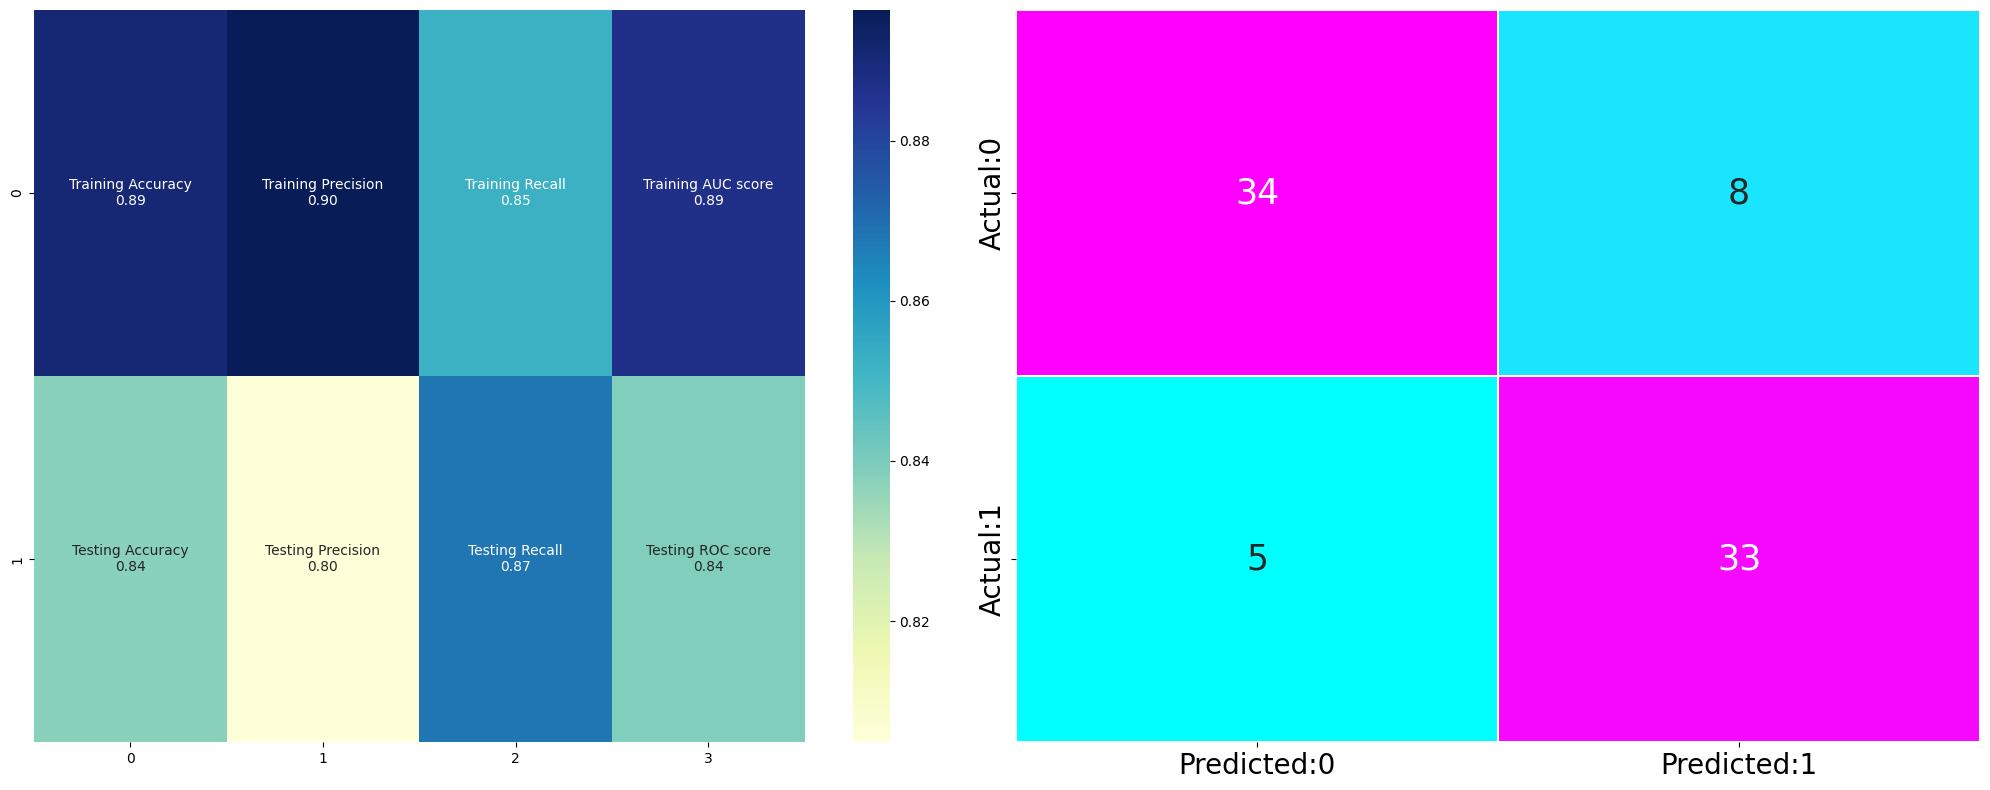

--------------------------------------------------




In [334]:
models = { "Logistic Regression":LogisticRegression()}
### Creating empty list to store model names
model_list=[]
### creating empty list to store accuracy score for each model
acc_score_list=[]
### creating empty list for storing precision score
prec_score_list=[]
### creating list to store recall score
recall_list=[]
### creating list to store roc_auc score
roc_auc_list=[]

model=list(models.values())[0]
    
    ### getting training data prediction and test data prediction
y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_train,y_pred )
print("{} Model\n".format(list(models.keys())[0]))
print("Model Performance for training dataset")

    
    
test_acc_score, test_prec_score,test_rec_score, test_roc_auc=model_evaluator(y_test,pred_val)
    
# creating random data
data = np.array([[acc_score, prec_score, rec_score, roc_auc], [test_acc_score,test_prec_score, test_rec_score, test_roc_auc] ])

text = np.array([['Training Accuracy', 'Training Precision', 'Training Recall', 'Training AUC score'], 
                 ['Testing Accuracy', 'Testing Precision', 'Testing Recall', 'Testing ROC score']])
  
    # combining text with values
formatted_text = (np.asarray(["{0}\n{1:.2f}".format(
text, data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2, 4)
  
    # drawing heatmap
fig, axes = plt.subplots(1,2,figsize=(20,8))
ax = sns.heatmap(data, annot=formatted_text, fmt="", cmap="YlGnBu",ax=axes[0])

cm = confusion_matrix(y_test, pred_val)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap="cool", cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25},ax=axes[1])

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)



plt.tight_layout()
plt.show()

model_list.append(list(models.keys())[0])
acc_score_list.append(acc_score)
prec_score_list.append(prec_score)
recall_list.append(rec_score)
roc_auc_list.append(roc_auc)
print("-"*50)
print("\n")

### KNN Classifer

In [335]:
# KNN model

tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the dictionary with hyperparameters and its values
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 17} 



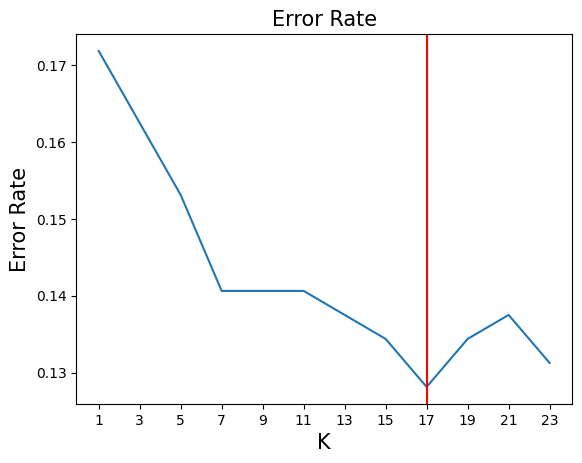

In [336]:

from sklearn.model_selection import cross_val_score 
# consider an empty list to store error rate

error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,25,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'euclidean')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, X_train, y_train, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,25,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 25, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 17, color = 'red')

# display the plot
plt.show()

In [337]:
models.items

<function dict.items>

KNN Model

Model Performance for training dataset


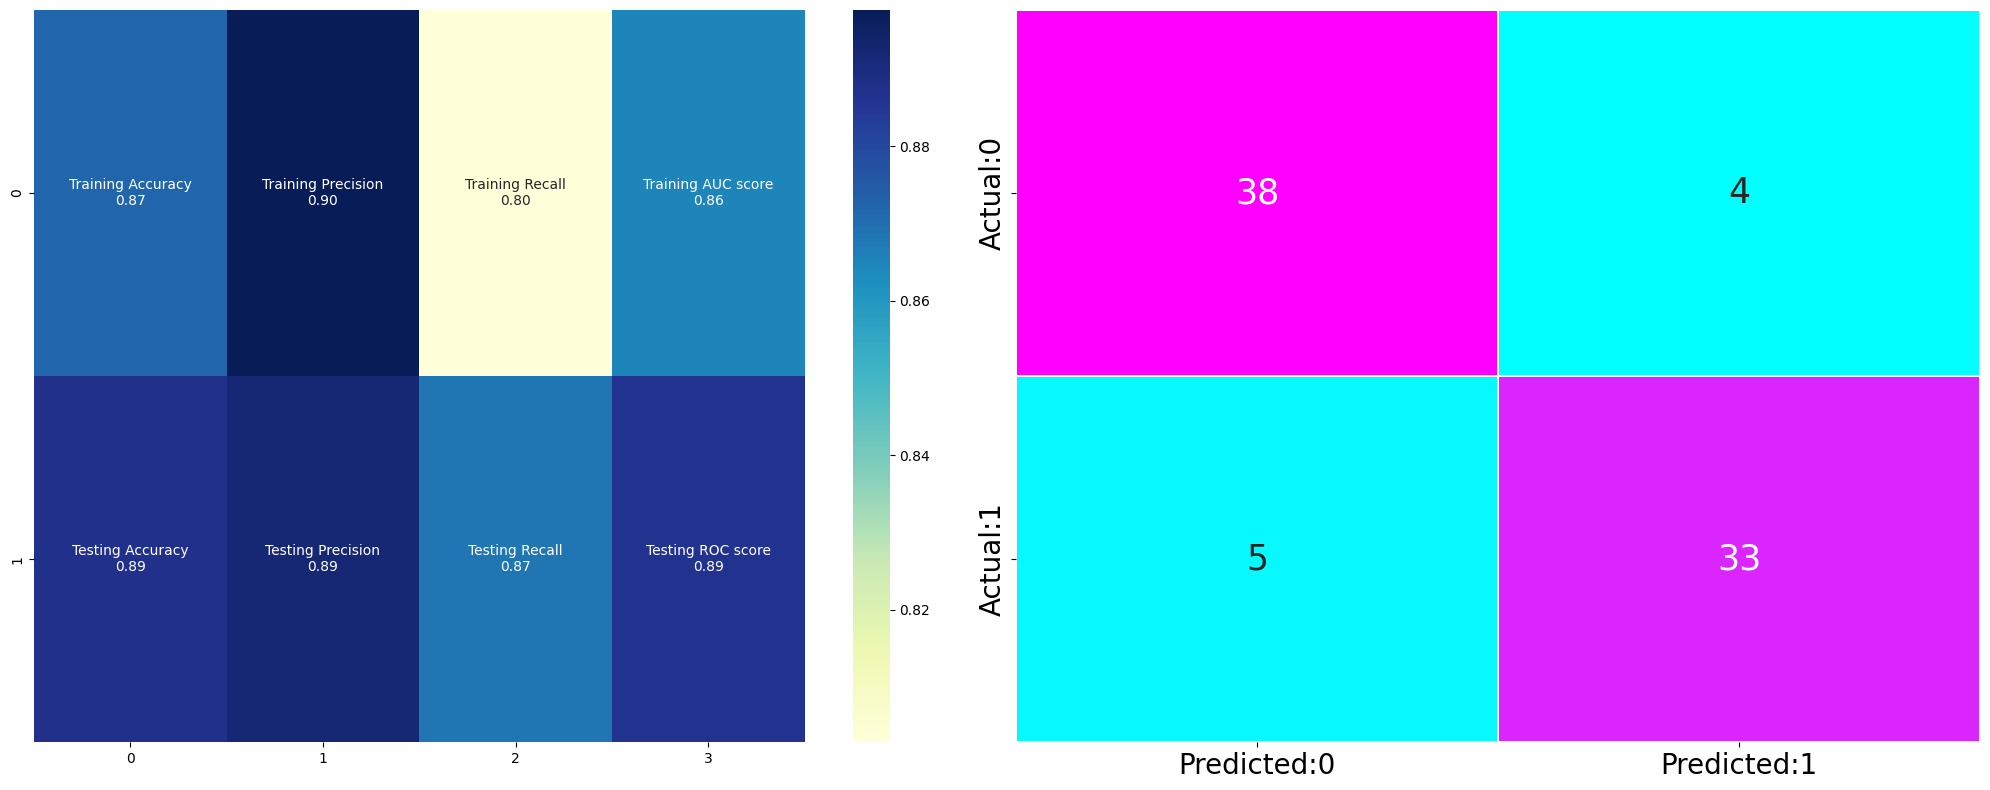

--------------------------------------------------




In [338]:

models = {"KNN":KNeighborsClassifier(metric= 'euclidean', n_neighbors= 17)}

model=list(models.values())[0]
    
    ### getting training data prediction and test data prediction
y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_train,y_pred )
print("{} Model\n".format(list(models.keys())[0]))
print("Model Performance for training dataset")

    
    
test_acc_score, test_prec_score,test_rec_score, test_roc_auc=model_evaluator(y_test,pred_val)
    
# creating random data
data = np.array([[acc_score, prec_score, rec_score, roc_auc], [test_acc_score,test_prec_score, test_rec_score, test_roc_auc] ])

text = np.array([['Training Accuracy', 'Training Precision', 'Training Recall', 'Training AUC score'], 
                 ['Testing Accuracy', 'Testing Precision', 'Testing Recall', 'Testing ROC score']])
  
    # combining text with values
formatted_text = (np.asarray(["{0}\n{1:.2f}".format(
text, data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2, 4)
  
    # drawing heatmap
fig, axes = plt.subplots(1,2,figsize=(20,8))
ax = sns.heatmap(data, annot=formatted_text, fmt="", cmap="YlGnBu",ax=axes[0])

cm = confusion_matrix(y_test, pred_val)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap="cool", cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25},ax=axes[1])

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)



plt.tight_layout()
plt.show()

model_list.append(list(models.keys())[0])
acc_score_list.append(acc_score)
prec_score_list.append(prec_score)
recall_list.append(rec_score)
roc_auc_list.append(roc_auc)
print("-"*50)
print("\n")

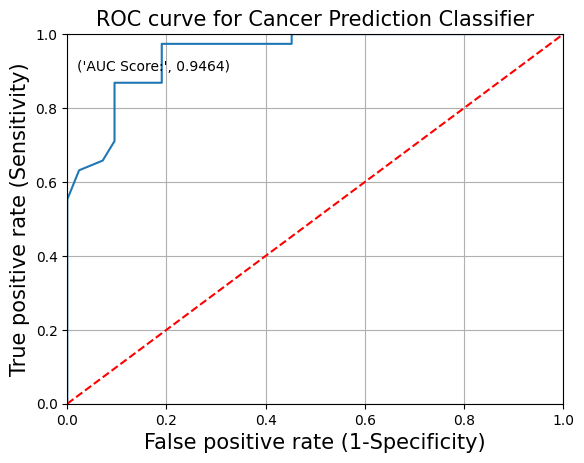

In [339]:
plot_roc(knn_grid, test_data=X_test)

### Naive Bayes

In [340]:


tuned_paramaters = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# instantiate the 'KNeighborsClassifier' 
NV_classification = GaussianNB()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the dictionary with hyperparameters and its values
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
NV_grid = GridSearchCV(estimator = NV_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
NV_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', NV_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'var_smoothing': 1.0} 



Naive Bayes Model

Model Performance for training dataset


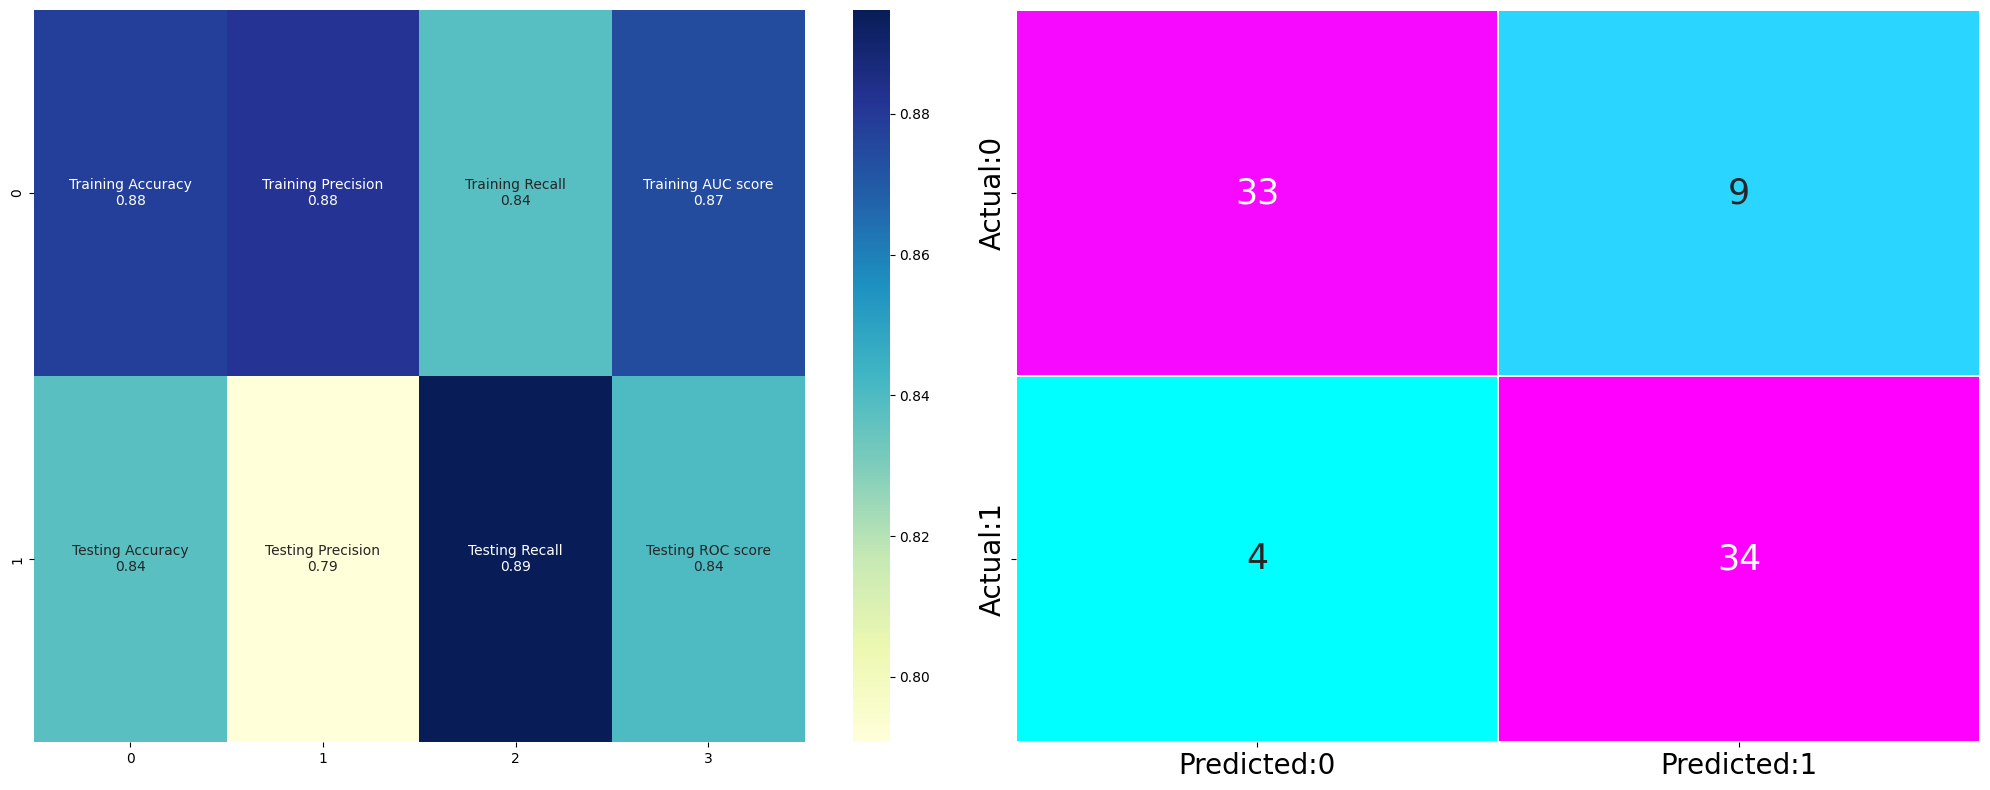

--------------------------------------------------




In [341]:
models= {"Naive Bayes":GaussianNB(var_smoothing=1.0)}

model=list(models.values())[0]
    
    ### getting training data prediction and test data prediction
y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_train,y_pred )
print("{} Model\n".format(list(models.keys())[0]))
print("Model Performance for training dataset")

    
    
test_acc_score, test_prec_score,test_rec_score, test_roc_auc=model_evaluator(y_test,pred_val)
    
# creating random data
data = np.array([[acc_score, prec_score, rec_score, roc_auc], [test_acc_score,test_prec_score, test_rec_score, test_roc_auc] ])

text = np.array([['Training Accuracy', 'Training Precision', 'Training Recall', 'Training AUC score'], 
                 ['Testing Accuracy', 'Testing Precision', 'Testing Recall', 'Testing ROC score']])
  
    # combining text with values
formatted_text = (np.asarray(["{0}\n{1:.2f}".format(
text, data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2, 4)
  
    # drawing heatmap
fig, axes = plt.subplots(1,2,figsize=(20,8))
ax = sns.heatmap(data, annot=formatted_text, fmt="", cmap="YlGnBu",ax=axes[0])

cm = confusion_matrix(y_test, pred_val)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap="cool", cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25},ax=axes[1])

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)



plt.tight_layout()
plt.show()

model_list.append(list(models.keys())[0])
acc_score_list.append(acc_score)
prec_score_list.append(prec_score)
recall_list.append(rec_score)
roc_auc_list.append(roc_auc)
print("-"*50)
print("\n")

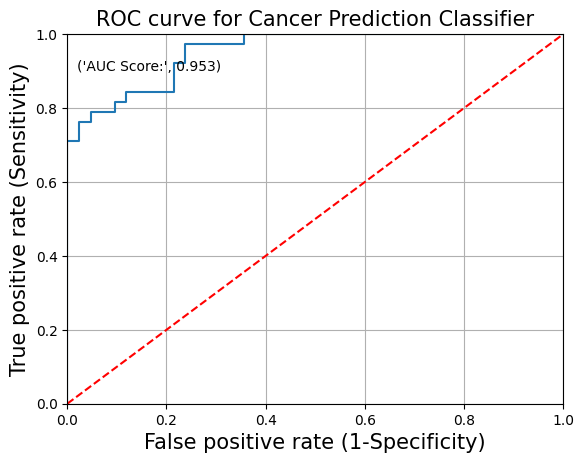

In [342]:
plot_roc(NV_grid, test_data=X_test)

### Decision Tree

Decision Tree Classifier Model

Model Performance for training dataset


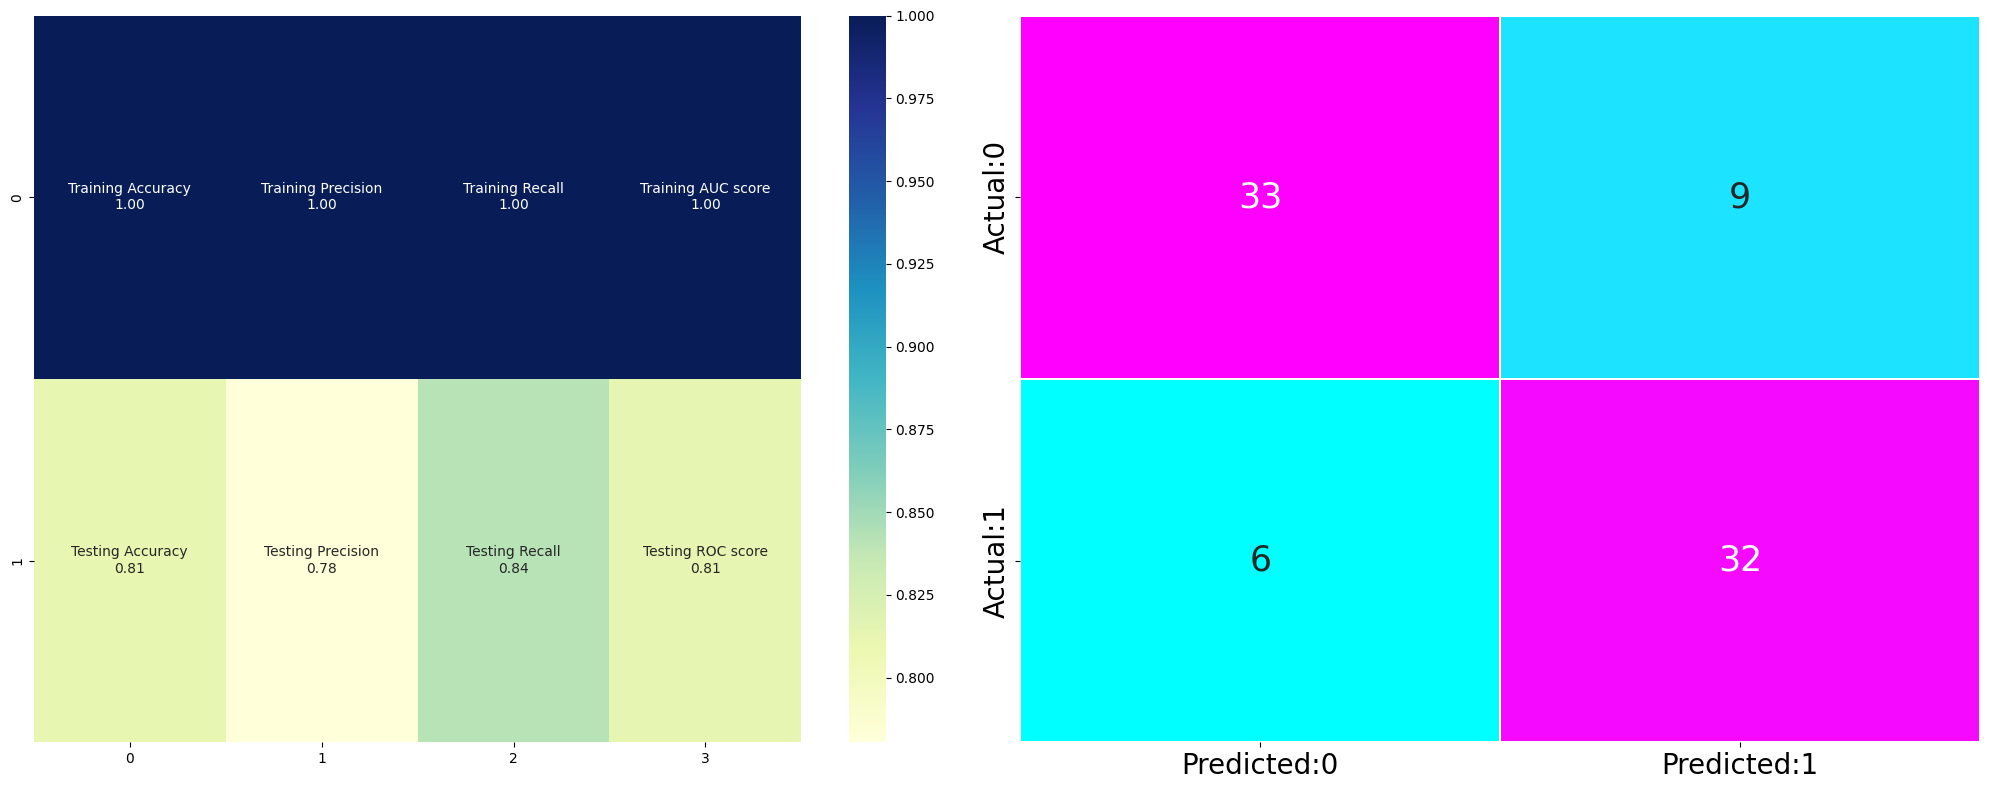

--------------------------------------------------




In [343]:
models= {"Decision Tree Classifier":DecisionTreeClassifier()}

model=list(models.values())[0]
    
    ### getting training data prediction and test data prediction
y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_train,y_pred )
print("{} Model\n".format(list(models.keys())[0]))
print("Model Performance for training dataset")

    
    
test_acc_score, test_prec_score,test_rec_score, test_roc_auc=model_evaluator(y_test,pred_val)
    
# creating random data
data = np.array([[acc_score, prec_score, rec_score, roc_auc], [test_acc_score,test_prec_score, test_rec_score, test_roc_auc] ])

text = np.array([['Training Accuracy', 'Training Precision', 'Training Recall', 'Training AUC score'], 
                 ['Testing Accuracy', 'Testing Precision', 'Testing Recall', 'Testing ROC score']])
  
    # combining text with values
formatted_text = (np.asarray(["{0}\n{1:.2f}".format(
text, data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2, 4)
  
    # drawing heatmap
fig, axes = plt.subplots(1,2,figsize=(20,8))
ax = sns.heatmap(data, annot=formatted_text, fmt="", cmap="YlGnBu",ax=axes[0])

cm = confusion_matrix(y_test, pred_val)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap="cool", cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25},ax=axes[1])

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)



plt.tight_layout()
plt.show()

model_list.append(list(models.keys())[0])
acc_score_list.append(acc_score)
prec_score_list.append(prec_score)
recall_list.append(rec_score)
roc_auc_list.append(roc_auc)
print("-"*50)
print("\n")

In [344]:

tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
 

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 4, 'min_samples_split': 2} 



Decision Tree Classifier with Grid searchCV Model

Model Performance for training dataset


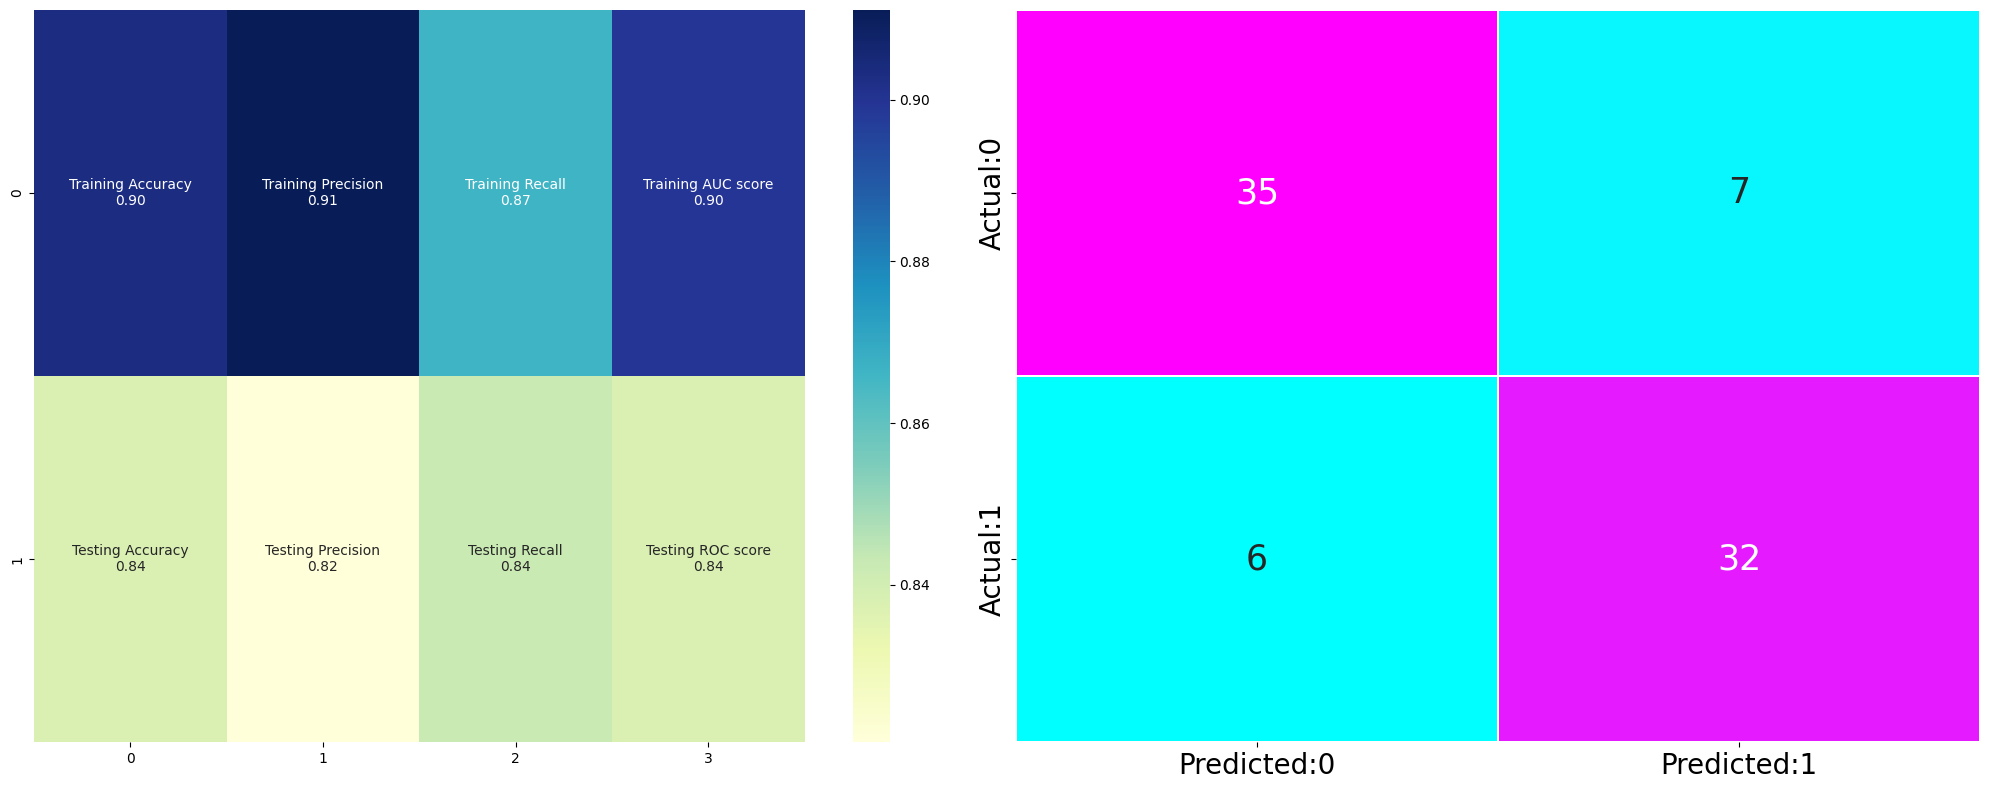

--------------------------------------------------




In [345]:
models= {"Decision Tree Classifier with Grid searchCV":DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_features= 'sqrt', max_leaf_nodes= 9, min_samples_leaf= 4, min_samples_split= 2)}

model=list(models.values())[0]
    
    ### getting training data prediction and test data prediction
y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_train,y_pred )
print("{} Model\n".format(list(models.keys())[0]))
print("Model Performance for training dataset")

    
    
test_acc_score, test_prec_score,test_rec_score, test_roc_auc=model_evaluator(y_test,pred_val)
    
# creating random data
data = np.array([[acc_score, prec_score, rec_score, roc_auc], [test_acc_score,test_prec_score, test_rec_score, test_roc_auc] ])

text = np.array([['Training Accuracy', 'Training Precision', 'Training Recall', 'Training AUC score'], 
                 ['Testing Accuracy', 'Testing Precision', 'Testing Recall', 'Testing ROC score']])
  
    # combining text with values
formatted_text = (np.asarray(["{0}\n{1:.2f}".format(
text, data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2, 4)
  
    # drawing heatmap
fig, axes = plt.subplots(1,2,figsize=(20,8))
ax = sns.heatmap(data, annot=formatted_text, fmt="", cmap="YlGnBu",ax=axes[0])

cm = confusion_matrix(y_test, pred_val)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap="cool", cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25},ax=axes[1])

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)



plt.tight_layout()
plt.show()

model_list.append(list(models.keys())[0])
acc_score_list.append(acc_score)
prec_score_list.append(prec_score)
recall_list.append(rec_score)
roc_auc_list.append(roc_auc)
print("-"*50)
print("\n")

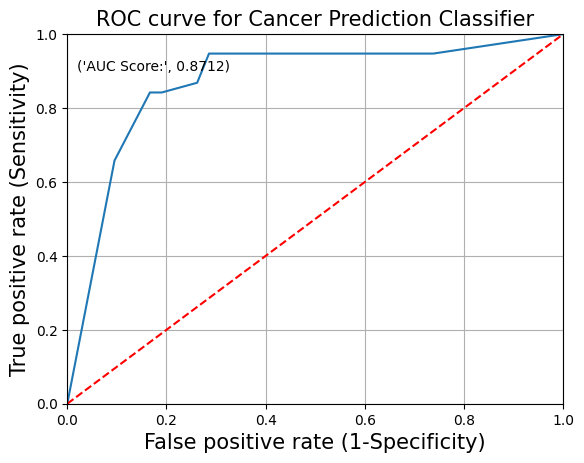

In [346]:
plot_roc(tree_grid, test_data=X_test)

### Random Forest

Random Forest Classifier Model

Model Performance for training dataset


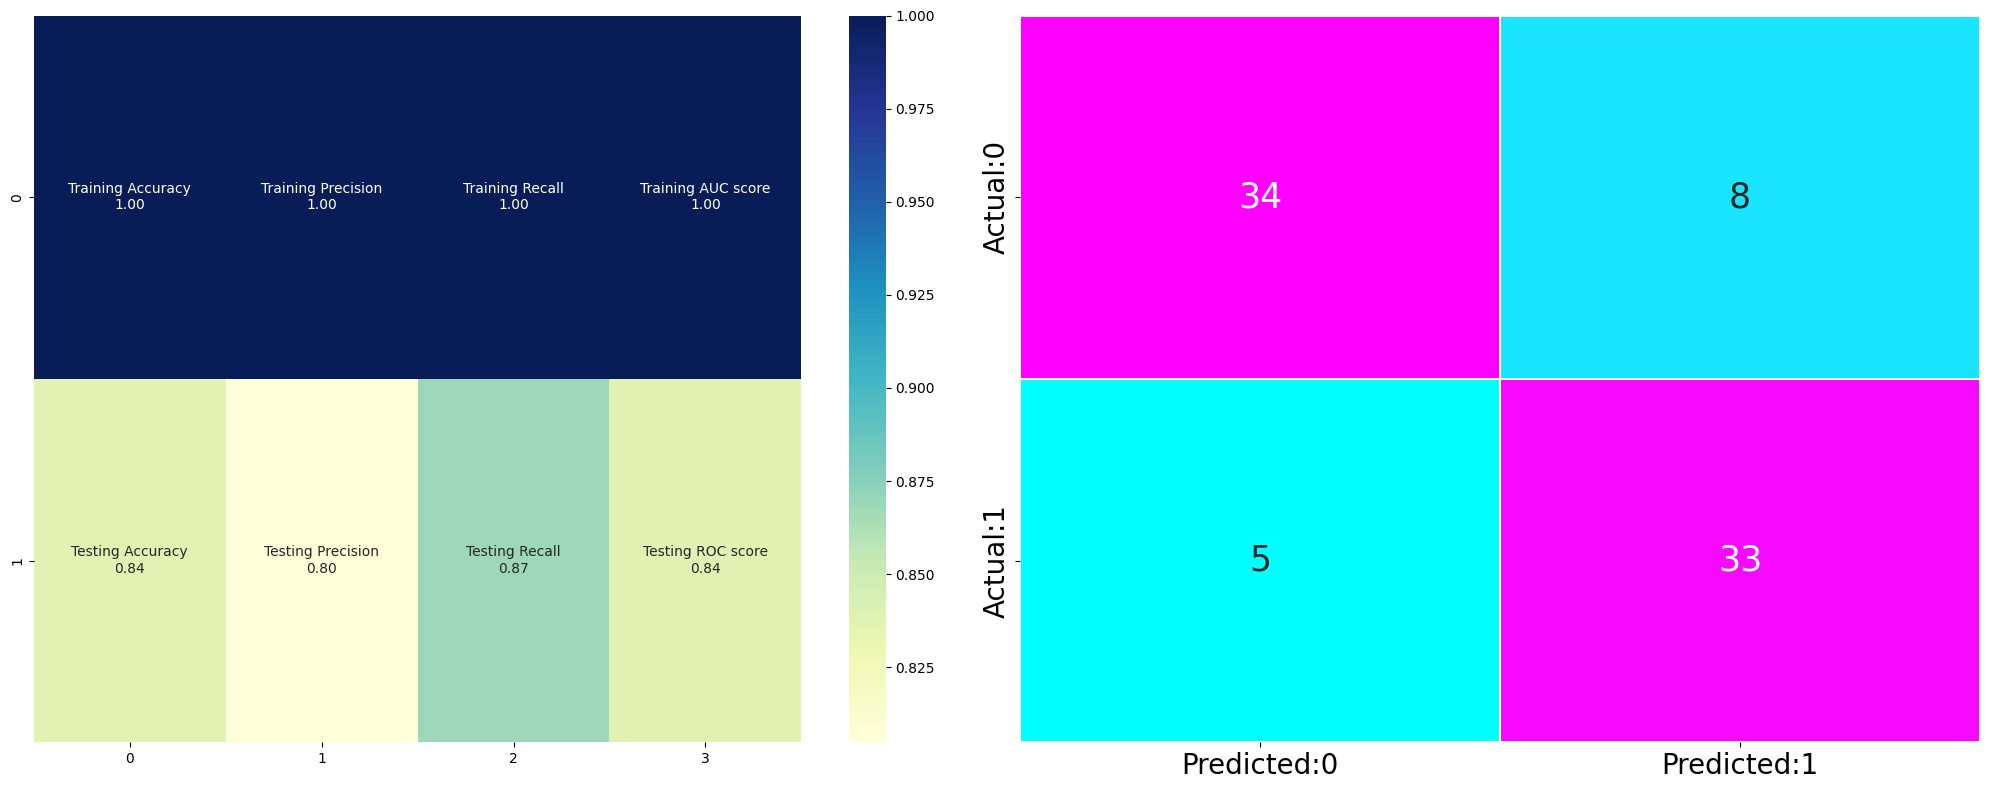

--------------------------------------------------




In [347]:
models= {"Random Forest Classifier":RandomForestClassifier()}

model=list(models.values())[0]
    
    ### getting training data prediction and test data prediction
y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_train,y_pred )
print("{} Model\n".format(list(models.keys())[0]))
print("Model Performance for training dataset")

    
    
test_acc_score, test_prec_score,test_rec_score, test_roc_auc=model_evaluator(y_test,pred_val)
    
# creating random data
data = np.array([[acc_score, prec_score, rec_score, roc_auc], [test_acc_score,test_prec_score, test_rec_score, test_roc_auc] ])

text = np.array([['Training Accuracy', 'Training Precision', 'Training Recall', 'Training AUC score'], 
                 ['Testing Accuracy', 'Testing Precision', 'Testing Recall', 'Testing ROC score']])
  
    # combining text with values
formatted_text = (np.asarray(["{0}\n{1:.2f}".format(
text, data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2, 4)
  
    # drawing heatmap
fig, axes = plt.subplots(1,2,figsize=(20,8))
ax = sns.heatmap(data, annot=formatted_text, fmt="", cmap="YlGnBu",ax=axes[0])

cm = confusion_matrix(y_test, pred_val)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap="cool", cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25},ax=axes[1])

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)



plt.tight_layout()
plt.show()

model_list.append(list(models.keys())[0])
acc_score_list.append(acc_score)
prec_score_list.append(prec_score)
recall_list.append(rec_score)
roc_auc_list.append(roc_auc)
print("-"*50)
print("\n")

In [348]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 10} 



Random Forest Classifier With GridsearchCV Model

Model Performance for training dataset


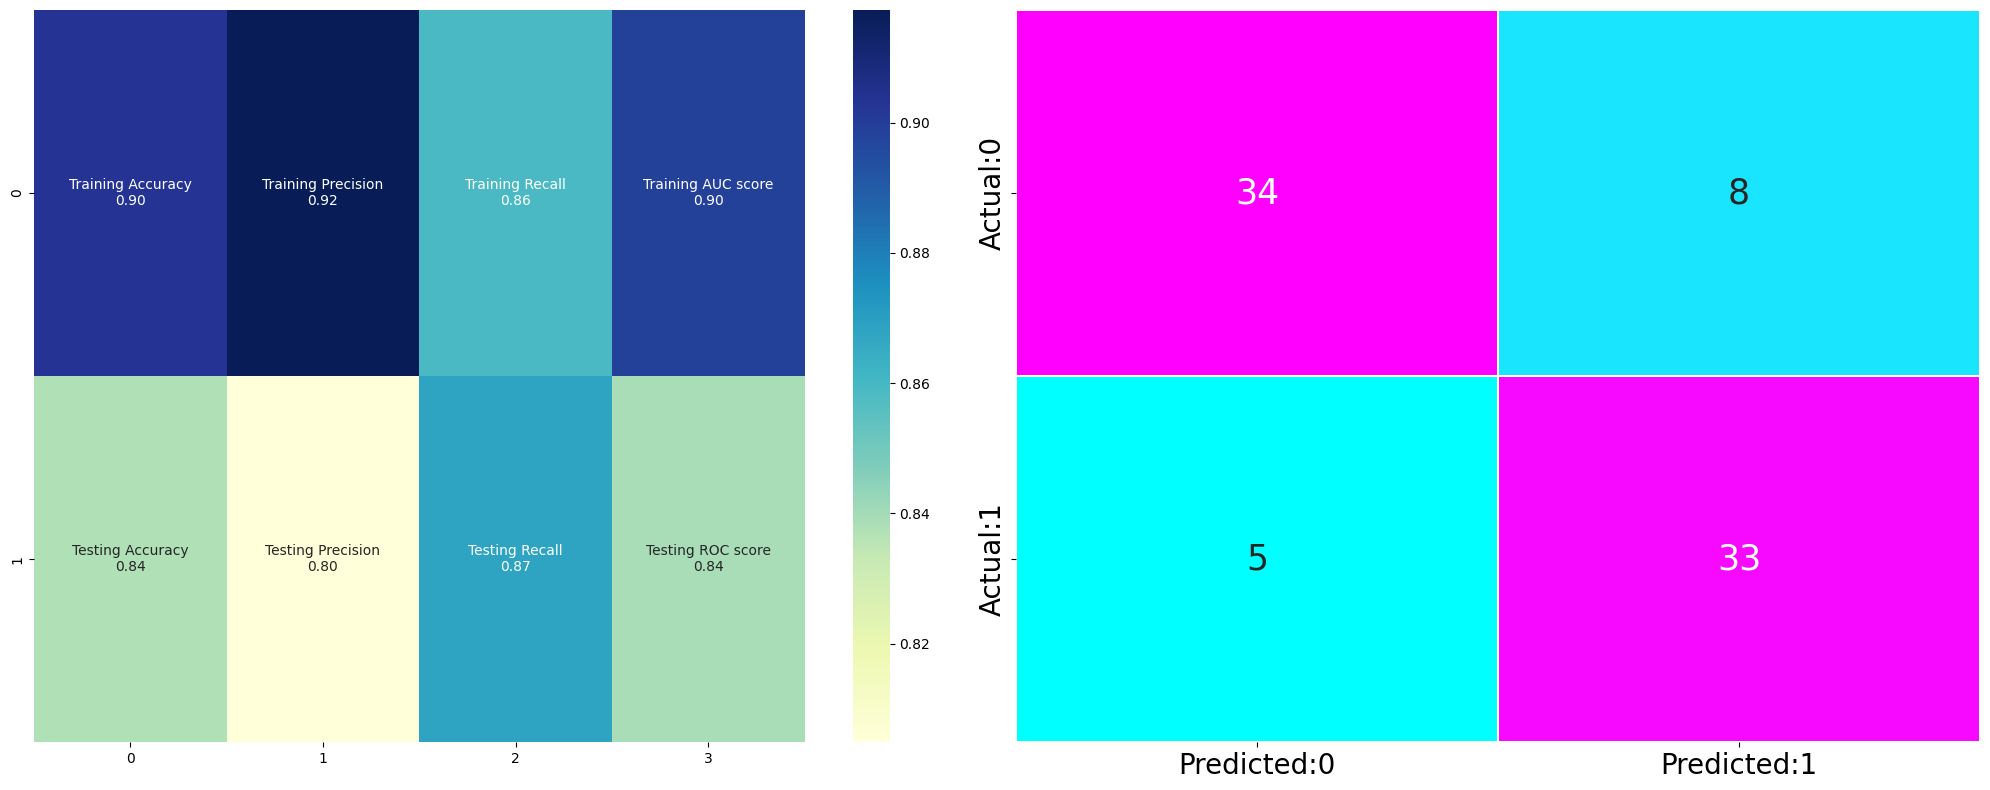

--------------------------------------------------




In [349]:
models= {"Random Forest Classifier With GridsearchCV":RandomForestClassifier(criterion='entropy', max_depth=10, max_features= 'sqrt', max_leaf_nodes= 5, min_samples_leaf=1, min_samples_split=11, n_estimators= 10)}

model=list(models.values())[0]
    
    ### getting training data prediction and test data prediction
y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_train,y_pred )
print("{} Model\n".format(list(models.keys())[0]))
print("Model Performance for training dataset")

    
    
test_acc_score, test_prec_score,test_rec_score, test_roc_auc=model_evaluator(y_test,pred_val)
    
# creating random data
data = np.array([[acc_score, prec_score, rec_score, roc_auc], [test_acc_score,test_prec_score, test_rec_score, test_roc_auc] ])

text = np.array([['Training Accuracy', 'Training Precision', 'Training Recall', 'Training AUC score'], 
                 ['Testing Accuracy', 'Testing Precision', 'Testing Recall', 'Testing ROC score']])
  
    # combining text with values
formatted_text = (np.asarray(["{0}\n{1:.2f}".format(
text, data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2, 4)
  
    # drawing heatmap
fig, axes = plt.subplots(1,2,figsize=(20,8))
ax = sns.heatmap(data, annot=formatted_text, fmt="", cmap="YlGnBu",ax=axes[0])

cm = confusion_matrix(y_test, pred_val)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap="cool", cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25},ax=axes[1])

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)



plt.tight_layout()
plt.show()

model_list.append(list(models.keys())[0])
acc_score_list.append(acc_score)
prec_score_list.append(prec_score)
recall_list.append(rec_score)
roc_auc_list.append(roc_auc)
print("-"*50)
print("\n")

In [350]:
df = pd.DataFrame(X_train,columns = df_admissions.columns.drop('Chance of Admit'))
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.587727,-0.029126,-0.055711,0.137448,0.079080,-0.058748,0.916013
1,-0.283787,-1.027731,-0.055711,-0.850942,-0.471041,-0.907216,-1.091687
2,-0.458089,-0.195560,-0.947079,0.137448,-0.471041,-0.541210,0.916013
3,0.500576,-0.029126,-0.055711,0.137448,0.079080,-0.208478,0.916013
4,0.326273,0.636611,0.835658,1.125838,0.079080,0.473624,0.916013


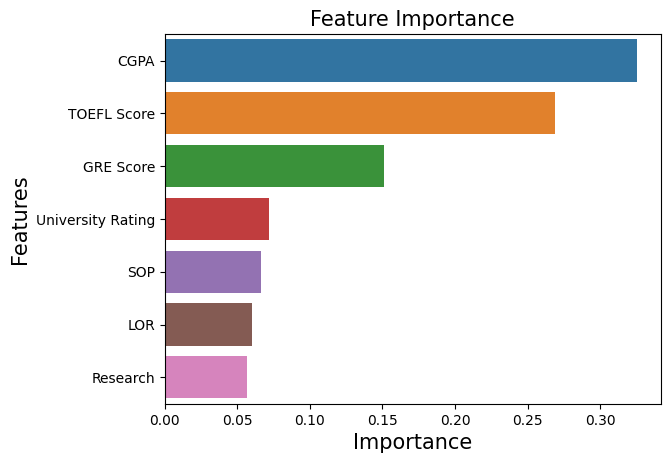

In [351]:
important_features = pd.DataFrame({'Features': df.columns, 
                                   'Importance': model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

### ADA Boost

AdaBoost Classifier Model

Model Performance for training dataset


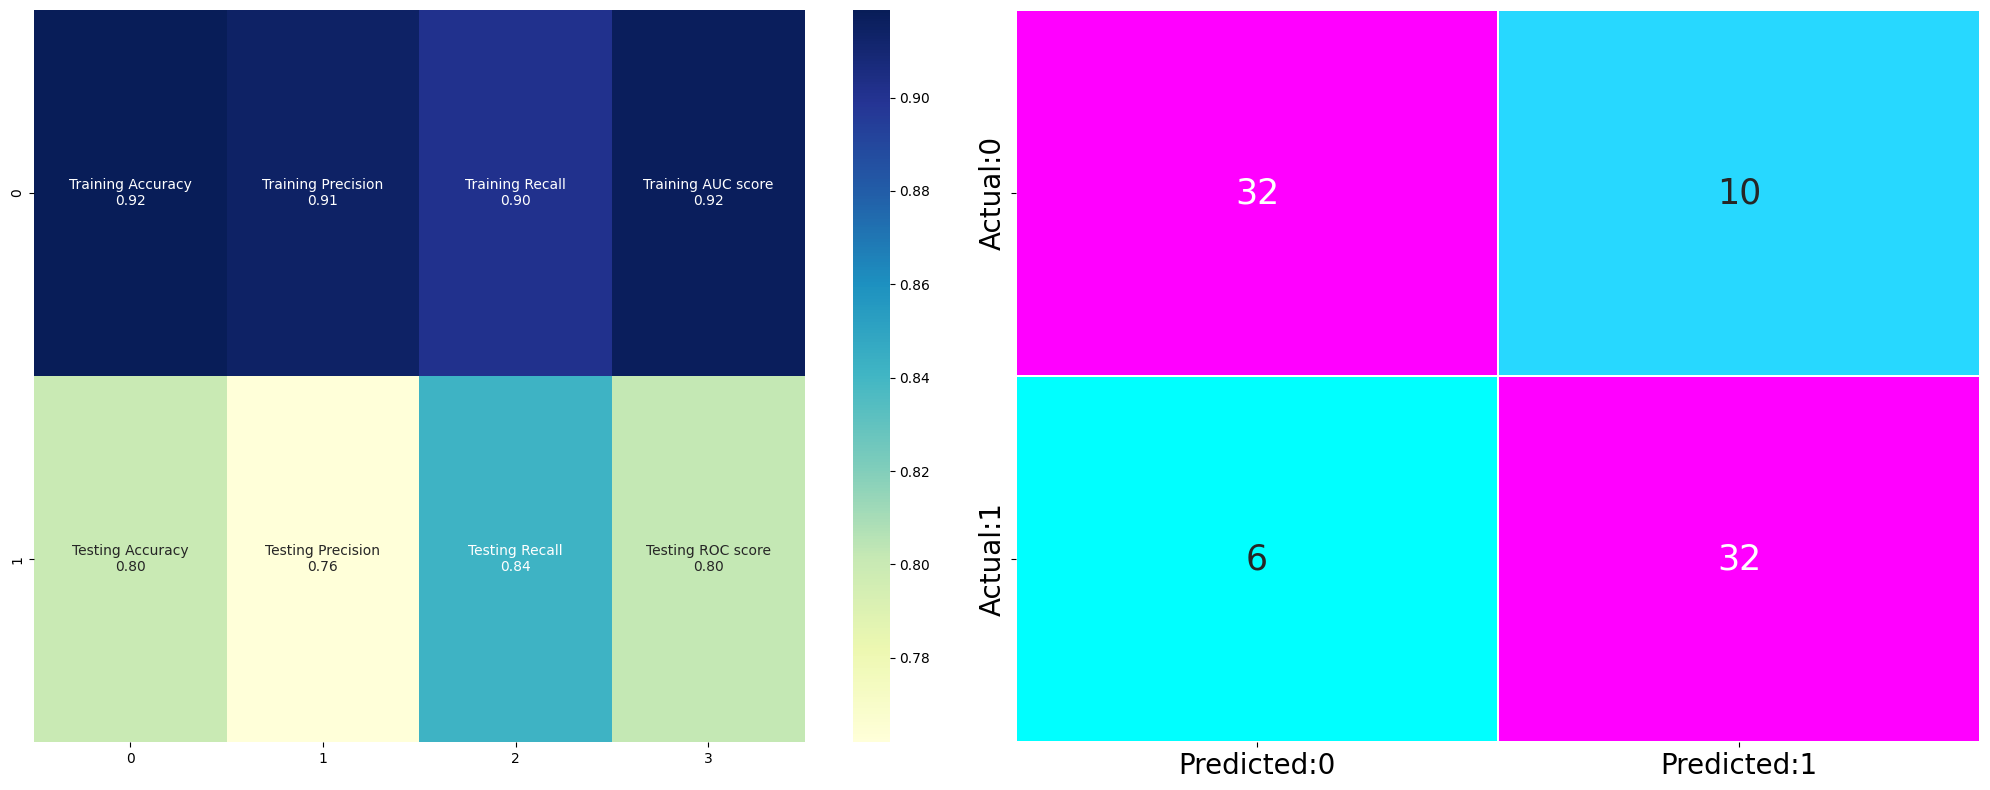

--------------------------------------------------




In [352]:

models= {"AdaBoost Classifier": AdaBoostClassifier()}

model=list(models.values())[0]
    
    ### getting training data prediction and test data prediction
y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_train,y_pred )
print("{} Model\n".format(list(models.keys())[0]))
print("Model Performance for training dataset")

    
    
test_acc_score, test_prec_score,test_rec_score, test_roc_auc=model_evaluator(y_test,pred_val)
    
# creating random data
data = np.array([[acc_score, prec_score, rec_score, roc_auc], [test_acc_score,test_prec_score, test_rec_score, test_roc_auc] ])

text = np.array([['Training Accuracy', 'Training Precision', 'Training Recall', 'Training AUC score'], 
                 ['Testing Accuracy', 'Testing Precision', 'Testing Recall', 'Testing ROC score']])
  
    # combining text with values
formatted_text = (np.asarray(["{0}\n{1:.2f}".format(
text, data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2, 4)
  
    # drawing heatmap
fig, axes = plt.subplots(1,2,figsize=(20,8))
ax = sns.heatmap(data, annot=formatted_text, fmt="", cmap="YlGnBu",ax=axes[0])

cm = confusion_matrix(y_test, pred_val)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap="cool", cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25},ax=axes[1])

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)



plt.tight_layout()
plt.show()

model_list.append(list(models.keys())[0])
acc_score_list.append(acc_score)
prec_score_list.append(prec_score)
recall_list.append(rec_score)
roc_auc_list.append(roc_auc)
print("-"*50)
print("\n")

In [353]:
tuned_paramaters = [{"n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}]
 
gbc = GradientBoostingClassifier()

gbc_grid = GridSearchCV(estimator = gbc, 
                       param_grid = tuned_paramaters, 
                       cv = 5)
gbc_grid_model = gbc_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for AdaBoost classifier: ', gbc_grid_model.best_params_, '\n')

Best parameters for AdaBoost classifier:  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250} 



AdaBoost Classifier with GridSearchCV Model

Model Performance for training dataset


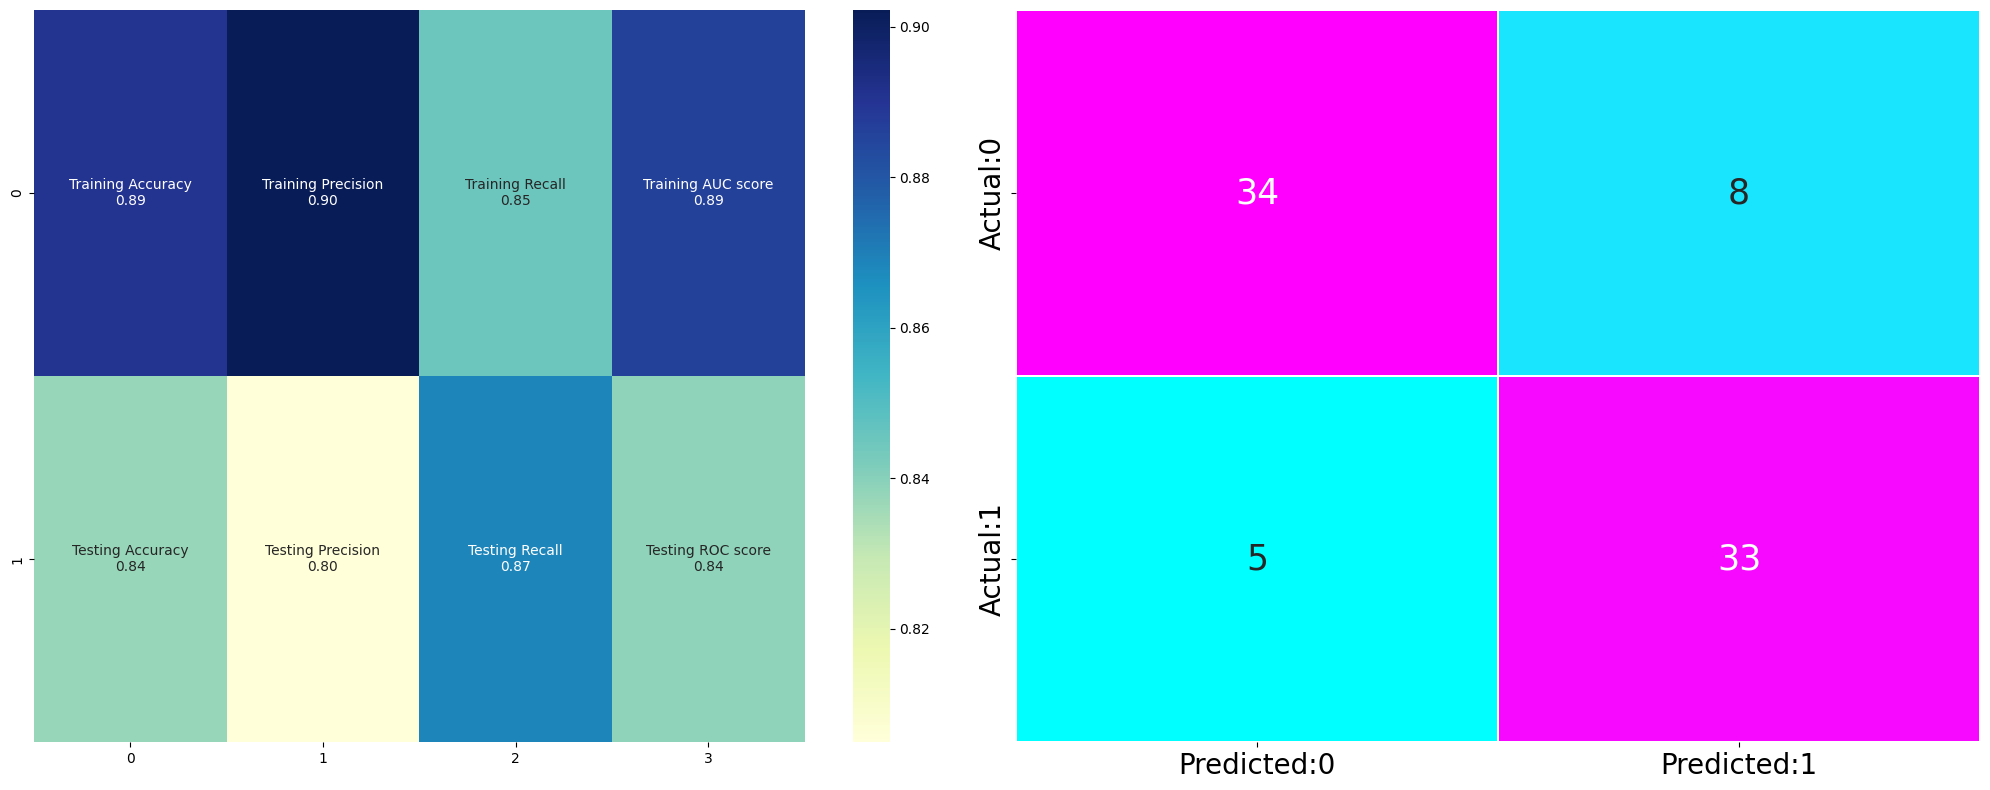

--------------------------------------------------




In [354]:
models= {"AdaBoost Classifier with GridSearchCV": AdaBoostClassifier(learning_rate= 0.01, n_estimators=250)}

model=list(models.values())[0]
    
    ### getting training data prediction and test data prediction
y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_train,y_pred )
print("{} Model\n".format(list(models.keys())[0]))
print("Model Performance for training dataset")

    
    
test_acc_score, test_prec_score,test_rec_score, test_roc_auc=model_evaluator(y_test,pred_val)
    
# creating random data
data = np.array([[acc_score, prec_score, rec_score, roc_auc], [test_acc_score,test_prec_score, test_rec_score, test_roc_auc] ])

text = np.array([['Training Accuracy', 'Training Precision', 'Training Recall', 'Training AUC score'], 
                 ['Testing Accuracy', 'Testing Precision', 'Testing Recall', 'Testing ROC score']])
  
    # combining text with values
formatted_text = (np.asarray(["{0}\n{1:.2f}".format(
text, data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2, 4)
  
    # drawing heatmap
fig, axes = plt.subplots(1,2,figsize=(20,8))
ax = sns.heatmap(data, annot=formatted_text, fmt="", cmap="YlGnBu",ax=axes[0])

cm = confusion_matrix(y_test, pred_val)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap="cool", cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25},ax=axes[1])

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)



plt.tight_layout()
plt.show()

model_list.append(list(models.keys())[0])
acc_score_list.append(acc_score)
prec_score_list.append(prec_score)
recall_list.append(rec_score)
roc_auc_list.append(roc_auc)
print("-"*50)
print("\n")

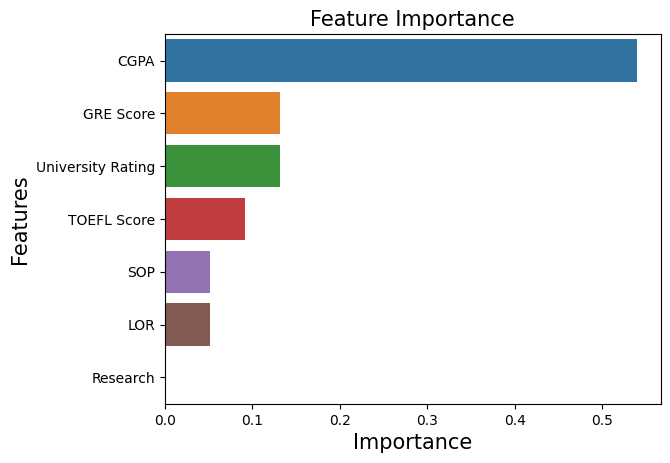

In [355]:
important_features = pd.DataFrame({'Features': df.columns, 
                                   'Importance': model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

### XG boost

[14:17:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier Model

Model Performance for training dataset


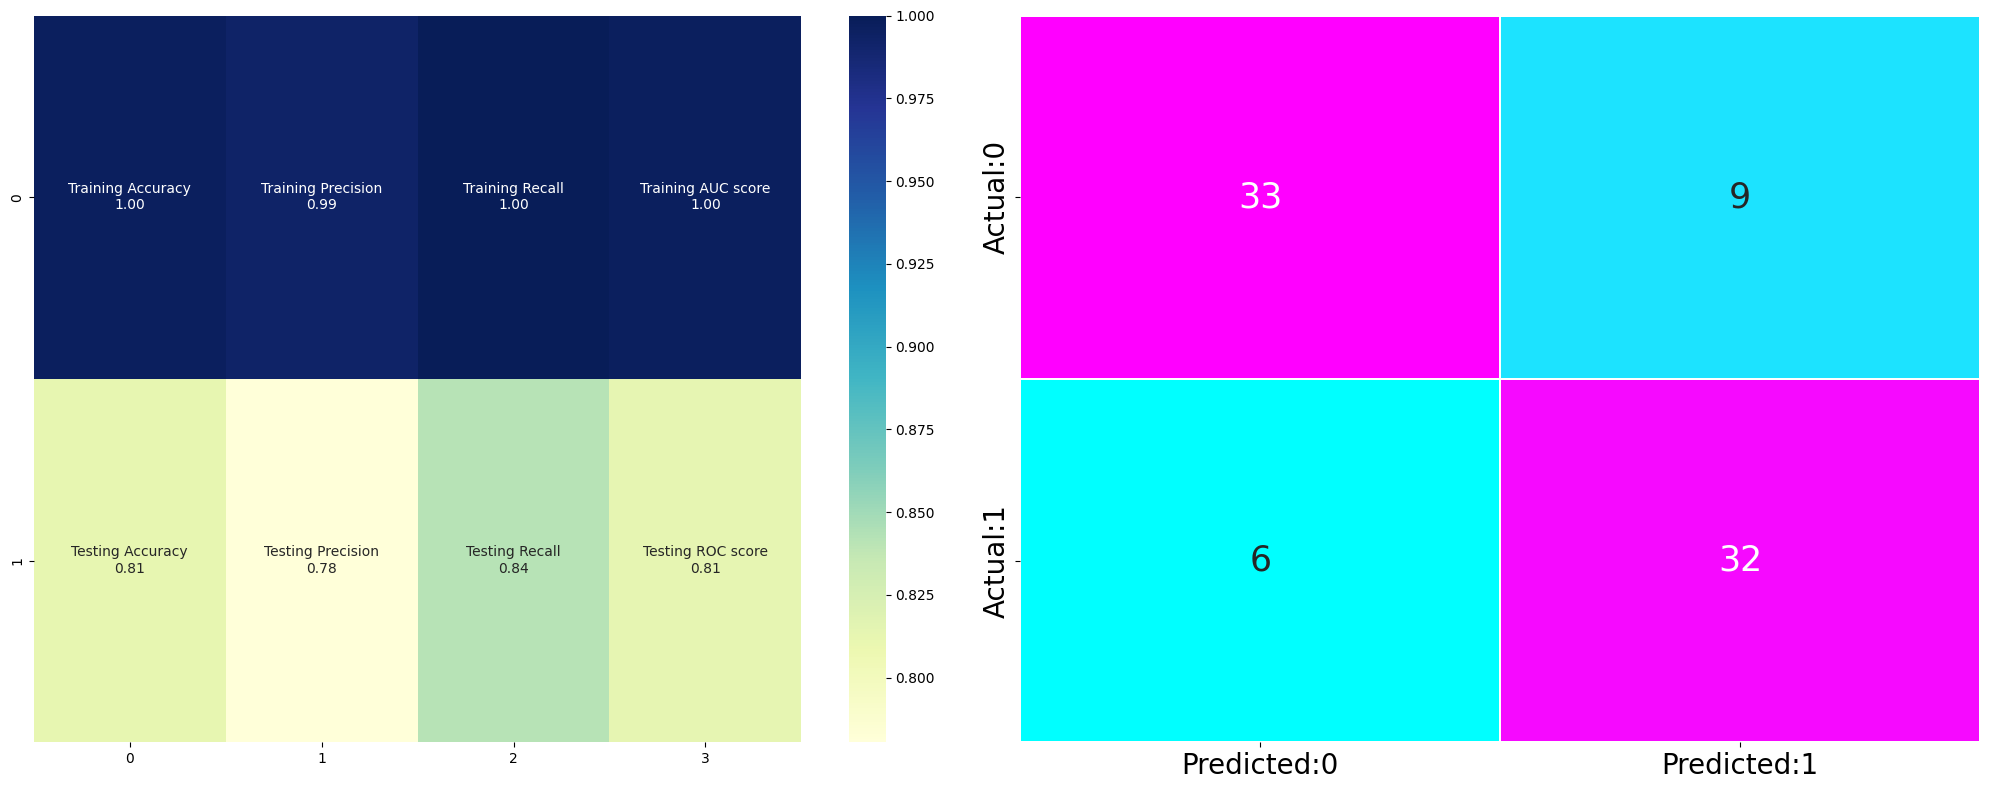

--------------------------------------------------




In [356]:
models= {"XGBoost Classifier": XGBClassifier()}

model=list(models.values())[0]
    
    ### getting training data prediction and test data prediction
y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)
    
    ### Getting model performance parameters for training data
acc_score, prec_score, rec_score, roc_auc=model_evaluator(y_train,y_pred )
print("{} Model\n".format(list(models.keys())[0]))
print("Model Performance for training dataset")

    
    
test_acc_score, test_prec_score,test_rec_score, test_roc_auc=model_evaluator(y_test,pred_val)
    
# creating random data
data = np.array([[acc_score, prec_score, rec_score, roc_auc], [test_acc_score,test_prec_score, test_rec_score, test_roc_auc] ])

text = np.array([['Training Accuracy', 'Training Precision', 'Training Recall', 'Training AUC score'], 
                 ['Testing Accuracy', 'Testing Precision', 'Testing Recall', 'Testing ROC score']])
  
    # combining text with values
formatted_text = (np.asarray(["{0}\n{1:.2f}".format(
text, data) for text, data in zip(text.flatten(), data.flatten())])).reshape(2, 4)
  
    # drawing heatmap
fig, axes = plt.subplots(1,2,figsize=(20,8))
ax = sns.heatmap(data, annot=formatted_text, fmt="", cmap="YlGnBu",ax=axes[0])

cm = confusion_matrix(y_test, pred_val)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap="cool", cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25},ax=axes[1])

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)



plt.tight_layout()
plt.show()

model_list.append(list(models.keys())[0])
acc_score_list.append(acc_score)
prec_score_list.append(prec_score)
recall_list.append(rec_score)
roc_auc_list.append(roc_auc)
print("-"*50)
print("\n")

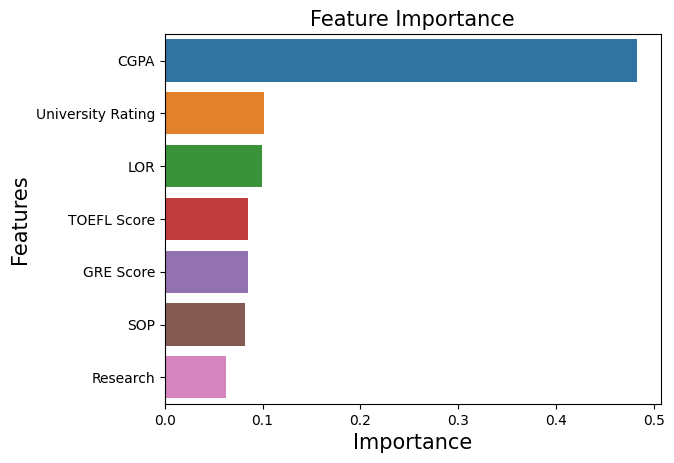

In [357]:
important_features = pd.DataFrame({'Features': df.columns, 
                                   'Importance': model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [358]:
### Tabulating model performance in dataframe
model_perf=pd.DataFrame(list(zip(model_list, acc_score_list,prec_score_list, recall_list, roc_auc_list)), columns=['Model', 'Accuracy', 'Precision', 'Recall', 'Roc_Auc Score']).sort_values(by=['Accuracy'], ascending=False,).reset_index()
model_perf.drop('index', axis=1, inplace=True)
model_perf

,Model,Accuracy,Precision,Recall,Roc_Auc Score
0,Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000
1,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
2,XGBoost Classifier,0.996880,0.993010,1.000000,0.997190
3,AdaBoost Classifier,0.918750,0.914290,0.901410,0.917000
4,Decision Tree Classifier with Grid searchCV,0.903120,0.911110,0.866200,0.899390
5,Random Forest Classifier With GridsearchCV,0.903120,0.917290,0.859150,0.898680
6,Logistic Regression,0.890620,0.896300,0.852110,0.886730
7,AdaBoost Classifier with GridSearchCV,0.890620,0.902260,0.845070,0.886020
8,Naive Bayes,0.878120,0.881480,0.838030,0.874070
9,KNN,0.871880,0.897640,0.802820,0.864890
